**Prediction using Supervised ML**

**GRIP - The Spark Foundation**


**Author: Parwinder Singh**

**Task 1: Prediction using Supervised Ml to predict the percentage of an student based on the no. of study hours.**

Importing required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import linear_model

from google.colab import files
uploaded = files.upload()

Saving hours.csv to hours (1).csv


In [21]:
df=pd.read_csv("hours.csv")
print("Data imported successfully")
df

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [22]:
df.shape

(25, 2)

In [23]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [25]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [26]:
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

**Exploring the dataset**


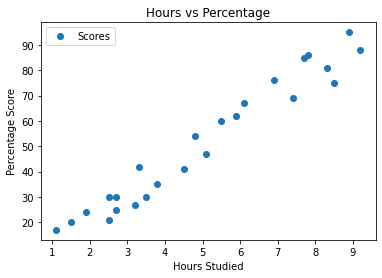

In [27]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [34]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [35]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [36]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

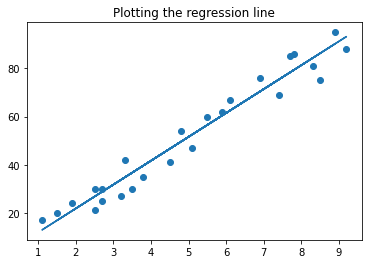

In [39]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title("Plotting the regression line")
plt.show()

In [28]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [40]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



**What will be predicted score if a student studies for 9.25 hrs/ day?**

Prediction through our model

In [ ]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


**Checking accuracy of our model**


In [ ]:
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train :  95.15510725211553
Test :  94.54906892105353


**Finding mean absolute error, r^2 score error and Mean Squared Error**


In [ ]:
from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, regressor.predict(X_test))) 
print('r^2 score error:',r2_score(y_test, regressor.predict(X_test)))
print('Mean squared error: ',mean_squared_error(y_test, regressor.predict(X_test)))

Mean absolute error: 4.183859899002982
r^2 score error: 0.9454906892105354
Mean squared error:  21.598769307217456


Mean absolute error:  4.691397441397446 which is quite accurate model for predicting the result
